# Depth Estimation

In [2]:
import cv2
import torch
import matplotlib.pyplot as plt

from depth_anything_v2.dpt import DepthAnythingV2

xFormers not available
xFormers not available


In [13]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print(DEVICE)

model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}

mps


In [4]:
small = DepthAnythingV2(**model_configs['vits'])
small.load_state_dict(torch.load(f'checkpoints/depth_anything_v2_vits.pth', map_location='cpu'))
small = small.to(DEVICE).eval()

In [5]:
base = DepthAnythingV2(**model_configs['vitb'])
base.load_state_dict(torch.load(f'checkpoints/depth_anything_v2_vitb.pth', map_location='cpu'))
base = base.to(DEVICE).eval()

In [37]:
large = DepthAnythingV2(**model_configs['vitl'])
large.load_state_dict(torch.load(f'checkpoints/depth_anything_v2_vitl.pth', map_location='cpu'))
large = large.to(DEVICE).eval()

In [ ]:
real_path = 'preprocessed_data/original_sequences/youtube/c23/videos/183/frame_0.png'

deepfake_path = 'preprocessed_data/manipulated_sequences/Deepfakes/c23/videos/183_253/frame_0.png'
face2face_path = 'preprocessed_data/manipulated_sequences/Face2Face/c23/videos/183_253/frame_0.png'
# faceshifter_path = 'preprocessed_data/manipulated_sequences/FaceShifter/c23/videos/183_253/frame_0.png'
faceswap_path = 'preprocessed_data/manipulated_sequences/FaceSwap/c23/videos/183_253/frame_0.png'
neuraltextures_path = 'preprocessed_data/manipulated_sequences/NeuralTextures/c23/videos/183_253/frame_0.png'

real = cv2.imread(real_path)

deepfake = cv2.imread(deepfake_path)
face2face = cv2.imread(face2face_path)
# faceshifter = cv2.imread(faceshifter_path)
faceswap = cv2.imread(faceswap_path)
neuraltextures = cv2.imread(neuraltextures_path)

In [ ]:
model = large
real_depth = model.infer_image(real)

deepfake_depth = model.infer_image(deepfake)
face2face_depth = model.infer_image(face2face)
# faceshifter_depth = model.infer_image(faceshifter)
faceswap_depth = model.infer_image(faceswap)
neuraltextures_depth = model.infer_image(neuraltextures)

In [52]:
names = ["real", "deepfake", "face2face", "faceswap", "neuraltextures"]
imgs = [real, deepfake, face2face, faceswap, neuraltextures]
depths = [real_depth, deepfake_depth, face2face_depth, faceswap_depth, neuraltextures_depth]

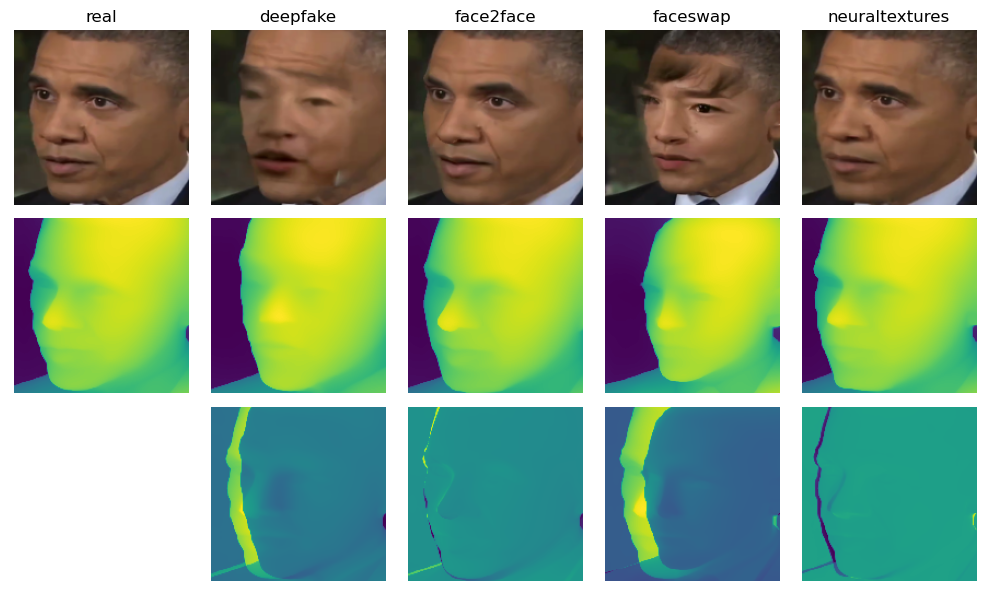

In [ ]:
fig, axs = plt.subplots(3, 5, figsize=(10, 6))

for i in range(5):
    axs[0, i].set_title(names[i])
    axs[0, i].axis('off')
    axs[0, i].imshow(imgs[i])
    axs[1, i].axis('off')
    axs[1, i].imshow(depths[i])
    axs[2, i].axis('off')
    if i > 0:
        axs[2, i].imshow(depths[0]-depths[i])
    
plt.tight_layout()
plt.show()

In [ ]:
real_path = 'preprocessed_data/original_sequences/youtube/c23/videos/253/frame_1.png'
deepfake_path = 'preprocessed_data/manipulated_sequences/Deepfakes/c23/videos/253_183/frame_1.png'
face2face_path = 'preprocessed_data/manipulated_sequences/Face2Face/c23/videos/253_183/frame_1.png'
faceswap_path = 'preprocessed_data/manipulated_sequences/FaceSwap/c23/videos/253_183/frame_1.png'
neuraltextures_path = 'preprocessed_data/manipulated_sequences/NeuralTextures/c23/videos/253_183/frame_1.png'

real = cv2.imread(real_path)
deepfake = cv2.imread(deepfake_path)
face2face = cv2.imread(face2face_path)
faceswap = cv2.imread(faceswap_path)
neuraltextures = cv2.imread(neuraltextures_path)

In [77]:
model = large
real_depth = model.infer_image(real)

deepfake_depth = model.infer_image(deepfake)
face2face_depth = model.infer_image(face2face)
faceswap_depth = model.infer_image(faceswap)
neuraltextures_depth = model.infer_image(neuraltextures)

In [78]:
imgs = [real, deepfake, face2face, faceswap, neuraltextures]
depths = [real_depth, deepfake_depth, face2face_depth, faceswap_depth, neuraltextures_depth]

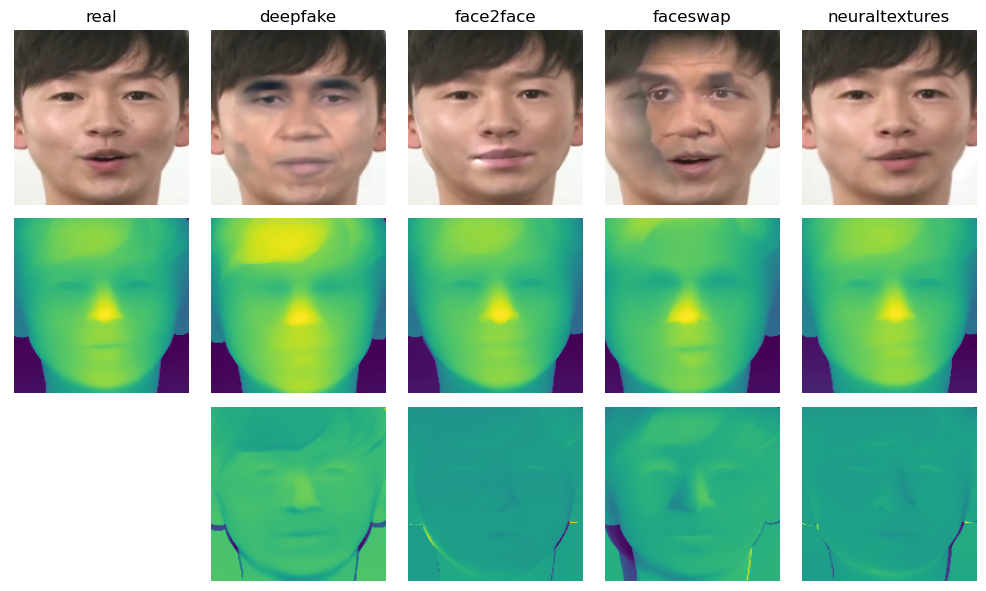

In [79]:
fig, axs = plt.subplots(3, 5, figsize=(10, 6))

for i in range(5):
    axs[0, i].set_title(names[i])
    axs[0, i].axis('off')
    axs[0, i].imshow(imgs[i])
    axs[1, i].axis('off')
    axs[1, i].imshow(depths[i])
    axs[2, i].axis('off')
    if i > 0:
        axs[2, i].imshow(depths[0]-depths[i])
    
plt.tight_layout()
plt.show()